RadonPy debug info: 2 candidates of stereoisomers were generated.


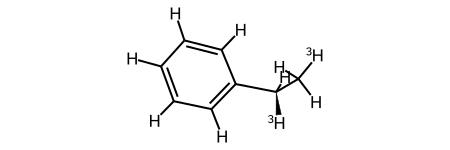

In [3]:
from radonpy.core import utils
smiles = '*CC(*)c1ccccc1'
mol = utils.mol_from_smiles(smiles) 
mol

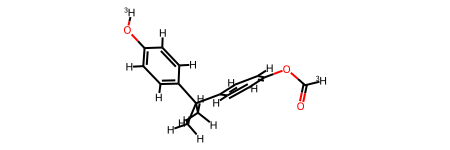

In [4]:
from radonpy.core import utils
smiles = '*Oc1ccc(cc1)C(c1ccc(cc1)OC(=O)*)(C)C'
mol = utils.mol_from_smiles(smiles) 
mol


In [6]:
from rdkit import Chem
import radonpy
import os

# Define the path to your SDF file
sdf_file_path = 'files\sm5_20251218-120237-507504\sm5_out.sdf' 

# Check if the file exists (optional, but good practice)
if not os.path.exists(sdf_file_path):
    print(f"Error: File not found at {sdf_file_path}")
else:
    # Use RDKit's SDMolSupplier to read the SDF file
    # This acts as an iterator, which is memory efficient for large files
    mol_supplier = Chem.SDMolSupplier(sdf_file_path)

    # Iterate through the molecules in the supplier
    for i, mol in enumerate(mol_supplier):
        if mol is not None:
            print(f"--- Molecule {i+1} ---")
            # Get the molecule name (usually the first line in the mol block)
            try:
                name = mol.GetProp('Name')
                print(f"Name: {name}")
            except:
                print("Name: Not found in properties")

            # Get SMILES string
            smiles = Chem.MolToSmiles(mol)
            print(f"SMILES: {smiles}")

            # You can now use this RDKit molecule object 'mol' in RadonPy functions
            # For example, to use a RadonPy function (replace with actual function if needed):
            # some_radonpy_object = radonpy.some_module.SomeClass(mol)
            
        else:
            print(f"--- Warning: Could not read molecule {i+1} ---")

--- Molecule 1 ---
Name: Not found in properties
SMILES: O=C(NCCO)Oc1ccccc1
--- Molecule 2 ---
Name: Not found in properties
SMILES: O=C(NCCO)Oc1ccccc1
--- Molecule 3 ---
Name: Not found in properties
SMILES: O=C(NCCO)Oc1ccccc1
--- Molecule 4 ---
Name: Not found in properties
SMILES: O=C(NCCO)Oc1ccccc1
--- Molecule 5 ---
Name: Not found in properties
SMILES: O=C(NCCO)Oc1ccccc1
--- Molecule 6 ---
Name: Not found in properties
SMILES: O=C(NCCO)Oc1ccccc1
--- Molecule 7 ---
Name: Not found in properties
SMILES: O=C(NCCO)Oc1ccccc1
--- Molecule 8 ---
Name: Not found in properties
SMILES: O=C(NCCO)Oc1ccccc1


In [2]:
from rdkit.Chem import PandasTools

In [3]:
SDFFile = "files\sm5_20251218-120237-507504\sm5_out.sdf"
sm5 = PandasTools.LoadSDF(SDFFile)

,ID,E_tot,fmax,Converged,E_rel(kcal/mol),ROMol
0,smi5,-630.4558989402904,0.002982925623655319,True,0.0,
1,smi5,-630.4541061210264,0.002992014167830348,True,1.1250110734091627,
2,smi5,-630.4540689955608,0.0029903112445026636,True,1.1483076548125914,
3,smi5,-630.4534378182155,0.002987346611917019,True,1.544377418756636,
4,smi5,-630.4529907054529,0.002985816914588213,True,1.8249449133160403,
5,smi5,-630.4506699351484,0.002962044905871153,True,3.2812502665169045,
6,smi5,-630.4506657791835,0.0029837845358997583,True,3.2838581738460726,
7,smi5,-630.4499695523704,0.0029752112459391356,True,3.7207470952052346,

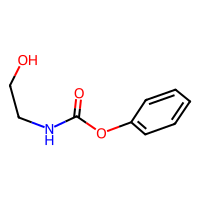
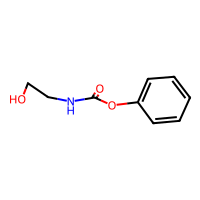
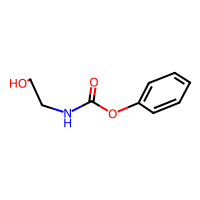
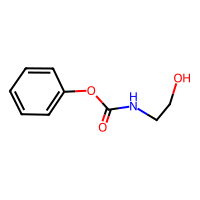
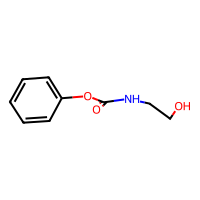
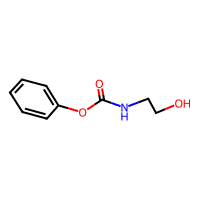
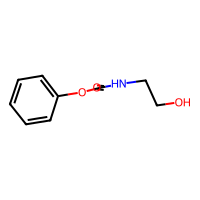
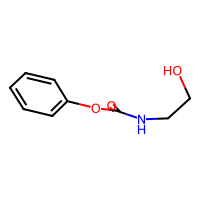

In [4]:
sm5

In [5]:
sm5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               8 non-null      object
 1   E_tot            8 non-null      object
 2   fmax             8 non-null      object
 3   Converged        8 non-null      object
 4   E_rel(kcal/mol)  8 non-null      object
 5   ROMol            8 non-null      object
dtypes: object(6)
memory usage: 448.0+ bytes


In [1]:
# Importing Libraries
import pandas as pd
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Heteroaromatics.xlsx')
df.head()
# Creating molecular object from Smiles
# PandasTools.AddMoleculeColumnToFrame(df,'Smiles','mol')
df

,Smiles
0,CN1C=CC=C1
1,C1=CC=CN1
2,C1=CN=CC=C1
3,CC1=NC=CC=C1
4,CC1=CC=NC=C1
5,CC1=C(C)C=NC=C1
6,CC1=NC(C)=CC=C1
7,CC(C)(C)C1=NC(C(C)(C)C)=CC=C1
8,CC1=NC(C)=CC(C)=C1
9,FC1=NC=CC=C1


In [3]:
mol_list = []

for smile in df['Smiles']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  mol_list.append(mol)

df = pd.concat([df, pd.DataFrame(mol_list, columns = (['mol']))], axis=1)

In [4]:
df.head(20)

,Smiles,mol
0,CN1C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...
1,C1=CC=CN1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...
2,C1=CN=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...
3,CC1=NC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...
4,CC1=CC=NC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...
5,CC1=C(C)C=NC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...
6,CC1=NC(C)=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...
7,CC(C)(C)C1=NC(C(C)(C)C)=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...
8,CC1=NC(C)=CC(C)=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...
9,FC1=NC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...


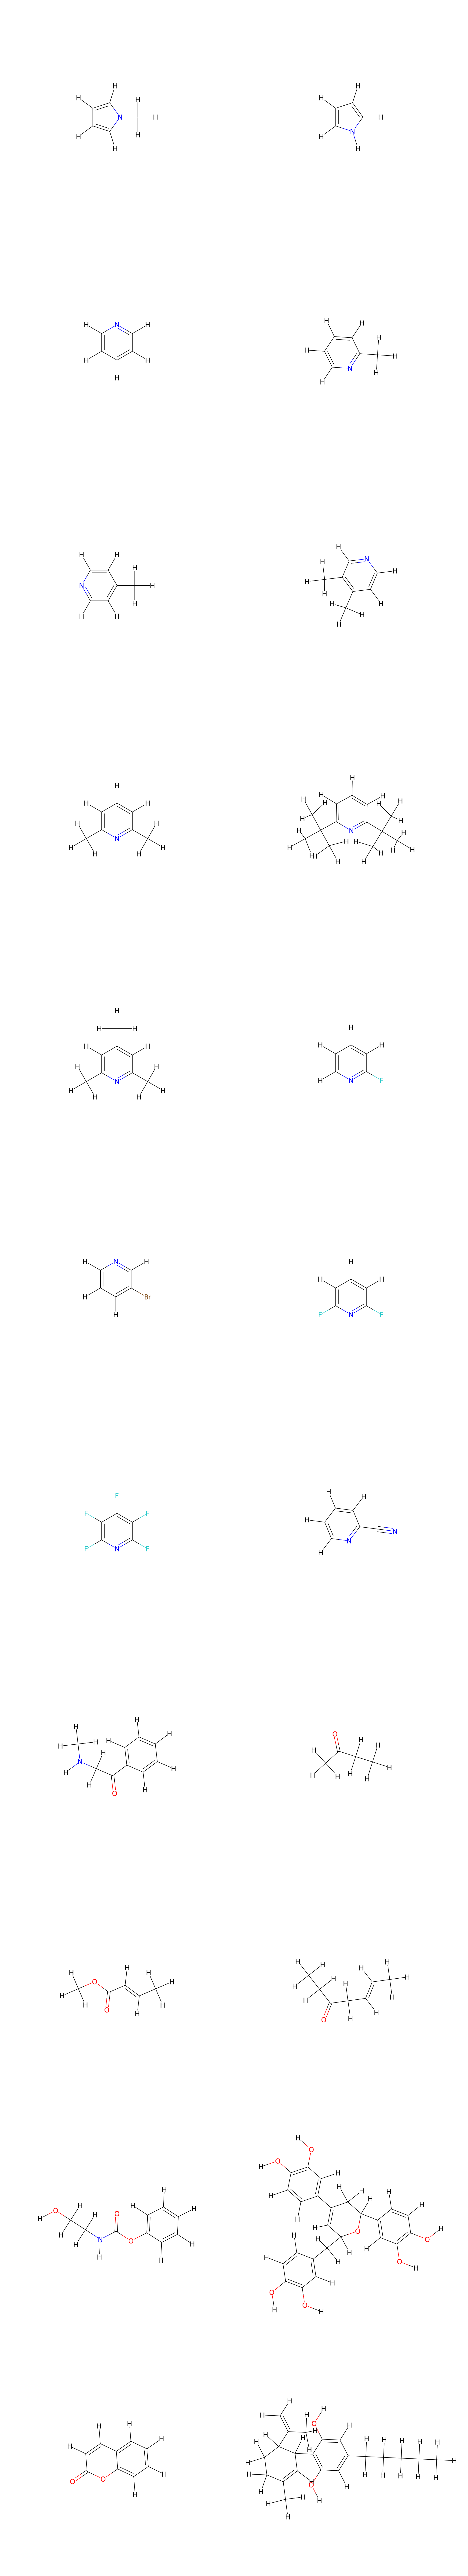

In [5]:
Draw.MolsToGridImage(df['mol'][:],molsPerRow=2,subImgSize=(1000,1000))

### Generating Molecular Descriptors Using RDKit
#### Create an instance of the class to print names and number of descriptors

In [6]:
Desc_list_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)
Desc_list_func

In [7]:
names = Desc_list_func.GetDescriptorNames()

In [8]:
names

('MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',


In [9]:
len(names)

217

### Again create an object of the molecule descriptor class

##### 1. Get Summary of the descriptors
##### 2. Generate molecular descriptors

In [10]:
MoleculeDescriptors.MolecularDescriptorCalculator(['MolLogP']).GetDescriptorSummaries()

['Wildman-Crippen LogP value']

In [11]:
# create another instance for calculating molecular descriptors
Des_func = MoleculeDescriptors.MolecularDescriptorCalculator(['NumHeteroatoms', 'NumHDonors'])

In [12]:
Des_func

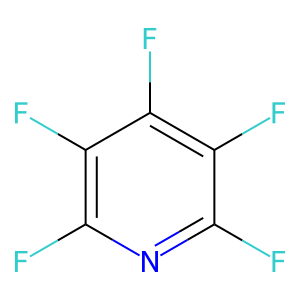

(6, 0)

In [13]:
display(Draw.MolToImage(df['mol'][12]))
Des_func.CalcDescriptors(df['mol'][12])

In [14]:
des = []
for mol in df['mol']:
  des.append(Des_func.CalcDescriptors(mol))

In [15]:
Final_df = pd.concat([df, pd.DataFrame(des, columns=(['NumHeteroatoms', 'NumHDonors']))], axis=1)

In [16]:
Final_df.head()

,Smiles,mol,NumHeteroatoms,NumHDonors
0,CN1C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...,1,0
1,C1=CC=CN1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...,1,1
2,C1=CN=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...,1,0
3,CC1=NC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...,1,0
4,CC1=CC=NC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...,1,0


In [17]:
# create another instance for calculating molecular descriptors
Des_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)

In [18]:
des = []

for mol in df['mol']:
  des.append(Des_func.CalcDescriptors(mol))

In [19]:
Final_df = pd.concat([df, pd.DataFrame(des, columns=(x[0] for x in Descriptors._descList))], axis=1)

In [20]:
Final_df.head()

,Smiles,mol,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CN1C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...,7.188079,7.188079,0.386574,-2.663426,0.439206,27.666667,81.118,74.062,...,0,0,0,0,0,0,0,0,0,0
1,C1=CC=CN1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...,6.969907,6.969907,0.361111,-0.407407,0.465869,22.000000,67.091,62.051,...,0,0,0,0,0,0,0,0,0,0
2,C1=CN=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...,7.070741,7.070741,0.397222,-0.420370,0.453148,19.666667,79.102,74.062,...,0,0,0,0,0,0,0,0,0,0
3,CC1=NC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...,7.275116,7.275116,0.525000,-2.614699,0.471998,24.857143,93.129,86.073,...,0,0,0,0,0,0,0,0,0,0
4,CC1=CC=NC=C1,<rdkit.Chem.rdchem.Mol object at 0x000001EC521...,7.275116,7.275116,0.581019,-2.650093,0.471998,24.857143,93.129,86.073,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Final_df.drop('mol', axis=1).to_excel('final.xlsx', index=None)

In [29]:
from radonpy.core import utils, poly
from radonpy.ff.gaff2_mod import GAFF2_mod
from radonpy.sim import qm
from radonpy.sim.preset import eq, tc

In [30]:
pwd

'F:\\saif\\dataset\\materialsproject'

In [1]:
from radonpy.core import utils, poly
from radonpy.ff.gaff2_mod import GAFF2_mod
from radonpy.sim import qm
from radonpy.sim.preset import eq, tc

smiles = '*C(C*)c1ccccc1'
ter_smiles = '*C'
temp = 300
press = 1.0
omp_psi4 = 10
mpi = 10
omp = 1
gpu = 0
mem = 10000
work_dir = './work_dir'
ff = GAFF2_mod()

In [2]:
if __name__== ' main ':
    # Conformation search
    mol = utils.mol_from_smiles(smiles)
    mol, energy = qm.conformation_search(mol, ff=ff, work_dir=work_dir,
                                         psi4_omp=omp_psi4, mpi=mpi, omp=omp, memory=mem, log_name='monomer1')
    
    # Electronic propety calculation
    qm.assign_charges(mol, charge='RESP', opt=False, work_dir=work_dir, omp=omp_psi4, memory=mem, log_name='monomer1')
    qm_data = qm.sp_prop(mol, opt=False, work_dir=work_dir, omp=omp_psi4, memory=mem, log_name='monomer1')
    polar_data = qm.polarizability(mol, opt=False, work_dir=work_dir, omp=omp_psi4, memory=mem, log_name='monomer1')

    # RESP charge calculation of a termination unit
    ter = utils.mol_from_smiles(ter_smiles)
    qm.assign_charges(ter, charge='RESP', opt=True, work_dir=work_dir, omp=omp_psi4, memory=mem, log_name='ter1')

    # Generate polymer chain
    dp = poly.calc_n_from_num_atoms(mol, 1000, terminal1=ter)
    homopoly = poly.polymerize_rw(mol, dp, tacticity='atactic')
    homopoly = poly.terminate_rw(homopoly, ter)

    # Force field assignment
    result = ff.ff_assign(homopoly)
    if not result:
        print('[ERROR: Can not assign force field parameters.]')

    # Generate simulation cell
    ac = poly.amorphous_cell(homopoly, 10, density=0.05)
    
    # Equilibration MD
    eqmd = eq.EQ21step(ac, work_dir=work_dir)
    ac = eqmd.exec(temp=temp, press=1.0, mpi=mpi, omp=omp, gpu=gpu)
    
    analy = eqmd.analyze()
    prop_data = analy.get_all_prop(temp=temp, press=1.0, save=True)
    result = analy.check_eq()
    
    # Additional equilibration MD
    for i in range(4):
        if result: break
        eqmd = eq.Additional(ac, work_dir=work_dir)
        ac = eqmd.exec(temp=temp, press=press, mpi=mpi, omp=omp, gpu=gpu)
        analy = eqmd.analyze()
        prop_data = analy.get_all_prop(temp=temp, press=press, save=True) # Calculation results of physical properties
        result = analy.check_eq()
    
    if not result:
        print('[ERROR: Did not reach an equilibrium state.]')
    
    # Non-equilibrium MD for thermal condultivity
    else:
        nemd = tc.NEMD_MP(ac, work_dir=work_dir)
        ac = nemd.exec(decomp=True, temp=temp, mpi=mpi, omp=omp, gpu=gpu)
        
        nemd_analy = nemd.analyze()
        TC = nemd_analy.calc_tc(decomp=True, save=True)
        if not nemd_analy.Tgrad_data['Tgrad_check']:
            print('[ERROR: Low linearity of temperature gradient.]')
    
        print('Thermal conductivity: %f' % TC)

In [41]:
from radonpy.core import utils, poly
from radonpy.ff.gaff2_mod import GAFF2_mod
from radonpy.sim import qm
from radonpy.sim.preset import eq, tc

# Memory conversion: GB → MB
def mem_convert(gb):
    return int(gb * 1024)

# Parameters
smiles = 'O=C(NCCO)OC1=CC=CC=C1'
#smiles = '*C(C*)c1ccccc1'
ter_smiles = '*C'
temp = 300
press = 1.0
omp_psi4 = 10
mpi = 10
omp = 1
gpu = 0
mem_gb = 10
work_dir = './work_dir'
ff = GAFF2_mod()

def get_log_name(name):
    return f'{name}_{temp}K'

# ---- QM Calculation Dispatcher (FIXED) ----
def run_qm_calc(mol_obj, calc_type, opt=False, log_suffix=''):
    if calc_type == 'charges':
        return qm.assign_charges(
            mol_obj,
            charge='RESP',
            opt=opt,
            work_dir=work_dir,
            omp=omp_psi4,
            memory=mem,
            log_name=get_log_name(f'{log_suffix}_resp')
        )

    elif calc_type == 'sp_prop':
        return qm.sp_prop(
            mol_obj,
            opt=opt,
            work_dir=work_dir,
            omp=omp_psi4,
            memory=mem,
            log_name=get_log_name(f'{log_suffix}_sp')
        )

    elif calc_type == 'polar':
        return qm.polarizability(
            mol_obj,
            opt=opt,
            work_dir=work_dir,
            omp=omp_psi4,
            memory=mem,
            log_name=get_log_name(f'{log_suffix}_polar')
        )

    else:
        raise ValueError(f"Unknown calculation type: {calc_type}")

# ---- Equilibration Dispatcher ----
def run_equilibration(cell, step_name):
    if step_name == 'initial':
        return eq.EQ21step(cell, work_dir=work_dir)
    else:
        return eq.Additional(cell, work_dir=work_dir)

# ---- Main Execution ----
if __name__ == '__main__':
    try:
        mem = mem_convert(mem_gb)

        # Conformation search
        mol = utils.mol_from_smiles(smiles)
        mol, energy = qm.conformation_search(
            mol,
            ff=ff,
            work_dir=work_dir,
            psi4_omp=omp_psi4,
            mpi=mpi,
            omp=omp,
            memory=mem,
            log_name=get_log_name('monomer1')
        )

        # Electronic properties
        run_qm_calc(mol, 'charges', opt=False, log_suffix='monomer1')
        run_qm_calc(mol, 'sp_prop', opt=False, log_suffix='monomer1')
        run_qm_calc(mol, 'polar', opt=False, log_suffix='monomer1')

        # Termination unit
        ter = utils.mol_from_smiles(ter_smiles)
        run_qm_calc(ter, 'charges', opt=True, log_suffix='ter1')

        # Polymerization
        dp = poly.calc_n_from_num_atoms(mol, 1000, terminal1=ter)
        homopoly = poly.polymerize_rw(mol, dp, tacticity='atactic')
        homopoly = poly.terminate_rw(homopoly, ter)

        # Force field assignment
        if not ff.ff_assign(homopoly):
            raise RuntimeError("Force field assignment failed")

        # Amorphous cell
        ac = poly.amorphous_cell(homopoly, 10, density=0.8)

        # Equilibration MD
        eqmd = run_equilibration(ac, 'initial')
        ac = eqmd.exec(temp=temp, press=press, mpi=mpi, omp=omp, gpu=gpu)

        analy = eqmd.analyze()
        analy.get_all_prop(temp=temp, press=press, save=True)
        result = analy.check_eq()

        # Additional equilibration
        for i in range(4):
            if result:
                break
            eqmd = run_equilibration(ac, f'additional_{i+1}')
            ac = eqmd.exec(temp=temp, press=press, mpi=mpi, omp=omp, gpu=gpu)
            analy = eqmd.analyze()
            analy.get_all_prop(temp=temp, press=press, save=True)
            result = analy.check_eq()

        if not result:
            print('[ERROR: Did not reach equilibrium.]')
            exit(1)

        # NEMD Thermal conductivity
        nemd = tc.NEMD_MP(ac, work_dir=work_dir)
        ac = nemd.exec(decomp=True, temp=temp, mpi=mpi, omp=omp, gpu=gpu)

        nemd_analy = nemd.analyze()
        TC = nemd_analy.calc_tc(decomp=True, save=True)

        if not nemd_analy.Tgrad_data['Tgrad_check']:
            print('[WARNING: Poor temperature gradient linearity]')

        print(f'Thermal conductivity: {TC:.6f} W/m·K')

    except Exception as e:
        import traceback
        print('[FATAL ERROR]')
        traceback.print_exc()

RadonPy debug info: 9 conformers were generated.
RadonPy info: Start optimization of 9 conformers by MM level.
RadonPy debug info: Using alternate bond type c,n instead of c,ns
RadonPy debug info: Using alternate bond type n,c3 instead of ns,c3
RadonPy debug info: Using alternate bond type n,hn instead of ns,hn
RadonPy debug info: Using alternate angle type o,c,n instead of o,c,ns
RadonPy debug info: Using alternate angle type n,c,os instead of ns,c,os
RadonPy debug info: Using alternate angle type c,n,c3 instead of c,ns,c3
RadonPy debug info: Using alternate angle type c,n,hn instead of c,ns,hn
RadonPy debug info: Using alternate angle type c3,n,hn instead of c3,ns,hn
RadonPy debug info: Using alternate angle type n,c3,c3 instead of ns,c3,c3
RadonPy debug info: Using alternate angle type n,c3,h1 instead of ns,c3,h1
RadonPy debug info: Using alternate angle type n,c3,h1 instead of ns,c3,h1
RadonPy debug info: Using alternate dihedral type o,c,n,c3 instead of o,c,ns,c3
RadonPy debug inf

Traceback (most recent call last):
  File "C:\Users\Krishan\AppData\Local\Temp\ipykernel_14028\3527294334.py", line 77, in <module>
    mol, energy = qm.conformation_search(
  File "F:\saif\saif2\lib\site-packages\radonpy\sim\qm.py", line 94, in conformation_search
    mol, energy = calc.conformation_search(mol, ff=ff, nconf=nconf, dft_nconf=dft_nconf, etkdg_ver=etkdg_ver, rmsthresh=rmsthresh, qm_solver=qm_solver,
  File "F:\saif\saif2\lib\site-packages\radonpy\core\calc.py", line 894, in conformation_search
    mol_c, energy, _ = md.quick_min(mol_c, confId=i, min_style='cg', solver=solver,
  File "F:\saif\saif2\lib\site-packages\radonpy\sim\md.py", line 402, in quick_min
    mol_copy = sol.run(md, mol=mol_copy, confId=confId, last_data=md.write_data, last_str=md.outstr, omp=omp, mpi=mpi, gpu=gpu)
  File "F:\saif\saif2\lib\site-packages\radonpy\sim\lammps.py", line 205, in run
    utils.radon_print('Error termination of %s. Input file = %s; Data file = %s; Return code = %i;'
  File "F: